In [15]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
#load dataset
df = pd.read_csv("data/World-Stock-Prices-Dataset.csv")

#read first five rows
df.head()

Date        Open        High         Low       Close  \
0  2025-07-03 00:00:00-04:00    6.630000    6.740000    6.615000    6.640000   
1  2025-07-03 00:00:00-04:00  106.750000  108.370003  106.330101  107.339996   
2  2025-07-03 00:00:00-04:00  122.629997  123.050003  121.550003  121.930000   
3  2025-07-03 00:00:00-04:00  221.705002  224.009995  221.360001  223.410004   
4  2025-07-03 00:00:00-04:00  212.145004  214.649994  211.810104  213.550003   

       Volume Brand_Name Ticker Industry_Tag  Country  Dividends  \
0   4209664.0    peloton   PTON      fitness      usa        0.0   
1    560190.0      crocs   CROX     footwear      usa        0.0   
2     36600.0     adidas  ADDYY      apparel  germany        0.0   
3  29295154.0     amazon   AMZN   e-commerce      usa        0.0   
4  34697317.0      apple   AAPL   technology      usa        0.0   

   Stock Splits  Capital Gains  
0           0.0            NaN  
1           0.0            NaN  
2           0.0            NaN  
3           0.0            NaN  
4           0.0            NaN

In [3]:
#check for missing values
df.isnull().sum()

Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Volume                0
Brand_Name            0
Ticker                0
Industry_Tag          0
Country               0
Dividends             0
Stock Splits          0
Capital Gains    310120
dtype: int64

In [4]:
#check for information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310122 entries, 0 to 310121
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           310122 non-null  object 
 1   Open           310122 non-null  float64
 2   High           310122 non-null  float64
 3   Low            310122 non-null  float64
 4   Close          310122 non-null  float64
 5   Volume         310122 non-null  float64
 6   Brand_Name     310122 non-null  object 
 7   Ticker         310122 non-null  object 
 8   Industry_Tag   310122 non-null  object 
 9   Country        310122 non-null  object 
 10  Dividends      310122 non-null  float64
 11  Stock Splits   310122 non-null  float64
 12  Capital Gains  2 non-null       float64
dtypes: float64(8), object(5)
memory usage: 30.8+ MB


In [6]:
#convert date column from object to datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310122 entries, 0 to 310121
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype                    
---  ------         --------------   -----                    
 0   Date           198840 non-null  datetime64[ns, UTC-04:00]
 1   Open           310122 non-null  float64                  
 2   High           310122 non-null  float64                  
 3   Low            310122 non-null  float64                  
 4   Close          310122 non-null  float64                  
 5   Volume         310122 non-null  float64                  
 6   Brand_Name     310122 non-null  object                   
 7   Ticker         310122 non-null  object                   
 8   Industry_Tag   310122 non-null  object                   
 9   Country        310122 non-null  object                   
 10  Dividends      310122 non-null  float64                  
 11  Stock Splits   310122 non-null  float64                  
 12  Ca

In [7]:
#drop the rows with missing value
new_df = df.drop("Capital Gains", axis=1)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310122 entries, 0 to 310121
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype                    
---  ------        --------------   -----                    
 0   Date          198840 non-null  datetime64[ns, UTC-04:00]
 1   Open          310122 non-null  float64                  
 2   High          310122 non-null  float64                  
 3   Low           310122 non-null  float64                  
 4   Close         310122 non-null  float64                  
 5   Volume        310122 non-null  float64                  
 6   Brand_Name    310122 non-null  object                   
 7   Ticker        310122 non-null  object                   
 8   Industry_Tag  310122 non-null  object                   
 9   Country       310122 non-null  object                   
 10  Dividends     310122 non-null  float64                  
 11  Stock Splits  310122 non-null  float64                  
dtypes: datetime64[ns

In [8]:
#drop rows with missing values
new_df.dropna(inplace=True)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198840 entries, 0 to 307979
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype                    
---  ------        --------------   -----                    
 0   Date          198840 non-null  datetime64[ns, UTC-04:00]
 1   Open          198840 non-null  float64                  
 2   High          198840 non-null  float64                  
 3   Low           198840 non-null  float64                  
 4   Close         198840 non-null  float64                  
 5   Volume        198840 non-null  float64                  
 6   Brand_Name    198840 non-null  object                   
 7   Ticker        198840 non-null  object                   
 8   Industry_Tag  198840 non-null  object                   
 9   Country       198840 non-null  object                   
 10  Dividends     198840 non-null  float64                  
 11  Stock Splits  198840 non-null  float64                  
dtypes: datetime64[ns, UTC

In [10]:
#check for duplicate values
print(new_df.duplicated().sum())

0


In [11]:
#sort values date by stock ticker (importance of time-series)
new_df = new_df.sort_values(by=["Ticker", "Date"])
new_df

Date       Open       High        Low      Close  \
307967 2000-04-03 00:00:00-04:00   1.026892   1.057207   0.980947   1.010314   
307916 2000-04-04 00:00:00-04:00   1.005104   1.007946   0.884795   0.964843   
307903 2000-04-05 00:00:00-04:00   0.958448   1.006998   0.939739   0.988052   
307852 2000-04-06 00:00:00-04:00   0.989947   1.019314   0.934055   0.948739   
307841 2000-04-07 00:00:00-04:00   0.964369   0.999419   0.951107   0.998472   
...                          ...        ...        ...        ...        ...   
231    2025-06-30 00:00:00-04:00  78.449997  78.485001  77.250000  77.980003   
206    2025-07-01 00:00:00-04:00  77.790001  78.175003  76.870003  77.570000   
116    2025-07-02 00:00:00-04:00  77.099998  77.699997  76.669998  77.589996   
9      2025-07-03 00:00:00-04:00  77.599998  79.824997  77.410004  78.580002   
92     2025-07-03 00:00:00-04:00  77.599998  79.824997  77.410004  78.580002   

             Volume                 Brand_Name Ticker Industry_Tag Country  \
307967  328563200.0                      apple   AAPL   technology     usa   
307916  660329600.0                      apple   AAPL   technology     usa   
307903  457665600.0                      apple   AAPL   technology     usa   
307852  259627200.0                      apple   AAPL   technology     usa   
307841  242435200.0                      apple   AAPL   technology     usa   
...             ...                        ...    ...          ...     ...   
231       3626300.0  zoom video communications     ZM   technology     usa   
206       3051600.0  zoom video communications     ZM   technology     usa   
116       2597000.0  zoom video communications     ZM   technology     usa   
9         2882442.0  zoom video communications     ZM   technology     usa   
92        2889400.0  zoom video communications     ZM   technology     usa   

        Dividends  Stock Splits  
307967        0.0           0.0  
307916        0.0           0.0  
307903        0.0           0.0  
307852        0.0           0.0  
307841        0.0           0.0  
...           ...           ...  
231           0.0           0.0  
206           0.0           0.0  
116           0.0           0.0  
9             0.0           0.0  
92            0.0           0.0  

[198840 rows x 12 columns]

In [12]:
# basic EDA
# describe the summary statistic of the dataset
new_df.describe()

Open           High            Low          Close  \
count  198840.000000  198840.000000  198840.000000  198840.000000   
mean       77.451353      78.329897      76.560935      77.466051   
std       143.948993     145.484195     142.315228     143.930224   
min         0.000000       0.000000       0.000000       0.198861   
25%        16.294854      16.514344      16.062667      16.288920   
50%        36.396505      36.799659      35.985061      36.420300   
75%        86.497845      87.482732      85.380388      86.421026   
max      3445.580078    3463.070068    3370.000000    3427.610107   

             Volume      Dividends   Stock Splits  
count  1.988400e+05  198840.000000  198840.000000  
mean   2.203470e+07       0.003476       0.001178  
std    8.202168e+07       0.063814       0.141394  
min    0.000000e+00       0.000000       0.000000  
25%    1.365600e+06       0.000000       0.000000  
50%    4.559750e+06       0.000000       0.000000  
75%    1.215745e+07       0.000000       0.000000  
max    7.421641e+09       9.283000      50.000000

In [13]:
#unique values for (brand_name, industries, countries)
print("Unique brand:", new_df["Brand_Name"].nunique())
print("Industries:", new_df["Industry_Tag"].nunique())
print("Country:", new_df["Country"].nunique())

Unique brand: 62
Industries: 23
Country: 7


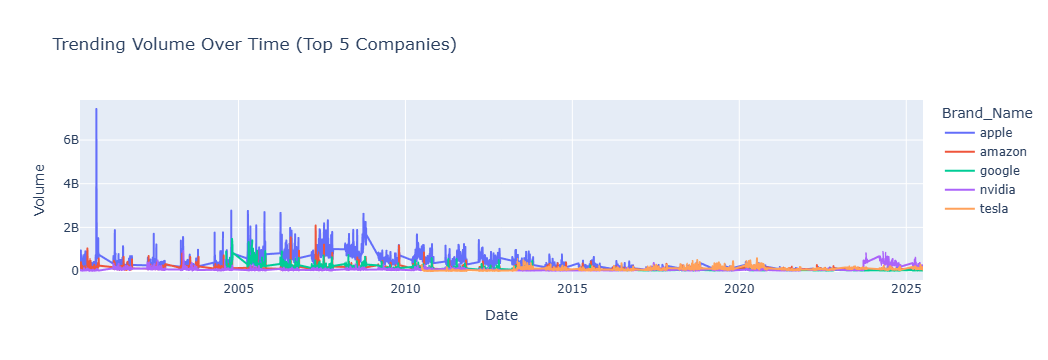

In [16]:
#trending volume over time (top 5 companies)
top_volume = (
    new_df.groupby("Brand_Name")["Volume"].sum().nlargest(5).index
)
#filter dataset for only those top companies
top_df = new_df[new_df["Brand_Name"].isin(top_volume)]
#line plot of volume over date
fig = px.line(
    top_df,
    x="Date",
    y="Volume",
    color="Brand_Name",
    title="Trending Volume Over Time (Top 5 Companies)"
)
fig.show()

In [17]:
#compare industries tag by close
industry_trends = new_df.groupby(["Date", "Industry_Tag"])["Close"].mean().reset_index()
industry_trends

Date    Industry_Tag       Close
0     2000-04-03 00:00:00-04:00         apparel    4.066681
1     2000-04-03 00:00:00-04:00      automotive   46.132162
2     2000-04-03 00:00:00-04:00        aviation   12.155299
3     2000-04-03 00:00:00-04:00  consumer goods   13.578048
4     2000-04-03 00:00:00-04:00      e-commerce    3.178125
...                         ...             ...         ...
77741 2025-07-03 00:00:00-04:00   manufacturing  152.940002
77742 2025-07-03 00:00:00-04:00           music  725.049988
77743 2025-07-03 00:00:00-04:00          retail  487.586670
77744 2025-07-03 00:00:00-04:00    social media   35.680000
77745 2025-07-03 00:00:00-04:00      technology  176.336000

[77746 rows x 3 columns]

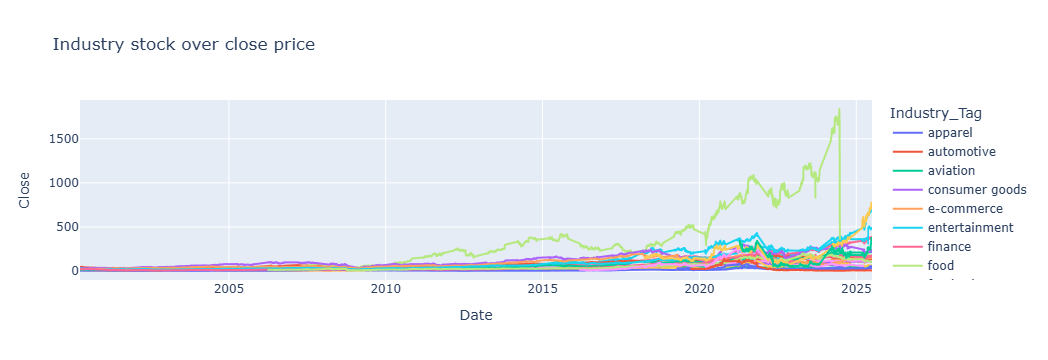

In [18]:
#industry_trend over close price using line plot
px.line(
    industry_trends,
    x="Date",
    y="Close",
    color="Industry_Tag",
    title="Industry stock over close price"
)

In [20]:
#compare country by close
country_trends = new_df.groupby(["Date", "Country"])["Close"].mean().reset_index()
country_trends

Date      Country       Close
0     2000-04-03 00:00:00-04:00        japan   32.029566
1     2000-04-03 00:00:00-04:00  netherlands   14.109744
2     2000-04-03 00:00:00-04:00  switzerland    5.775072
3     2000-04-03 00:00:00-04:00          usa   19.664107
4     2000-04-04 00:00:00-04:00        japan   31.980430
...                         ...          ...         ...
24312 2025-07-03 00:00:00-04:00      germany   61.376250
24313 2025-07-03 00:00:00-04:00        japan   86.618000
24314 2025-07-03 00:00:00-04:00  netherlands   42.770000
24315 2025-07-03 00:00:00-04:00  switzerland   92.690002
24316 2025-07-03 00:00:00-04:00          usa  236.919781

[24317 rows x 3 columns]

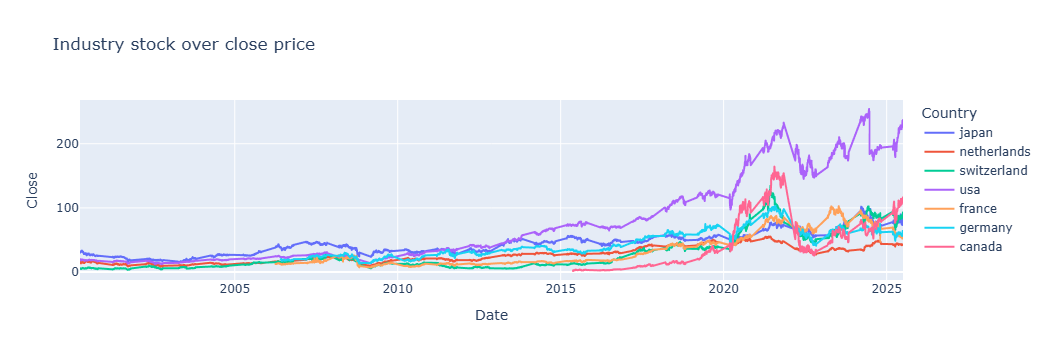

In [21]:
#country_trend over close price using line plot
px.line(
    country_trends,
    x="Date",
    y="Close",
    color="Country",
    title="Industry stock over close price"
)

In [22]:
volume_trends = new_df.groupby("Brand_Name")["Volume"].sum().sort_values(ascending=False).head(10)
volume_trends

Brand_Name
apple                    1.491164e+12
amazon                   4.565005e+11
google                   3.566855e+11
nvidia                   3.388455e+11
tesla                    2.462396e+11
microsoft                1.972658e+11
cisco                    1.628426e+11
amd                      1.459909e+11
jpmorgan chase & co      8.120276e+10
the coca-cola company    6.055546e+10
Name: Volume, dtype: float64

<Axes: ylabel='Brand_Name'>

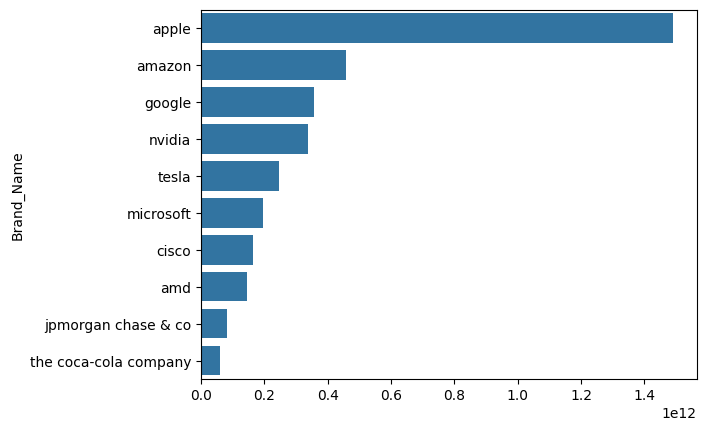

In [23]:
sns.barplot(
    x=volume_trends.values,
    y=volume_trends.index
)

In [25]:
#compute the daily return
new_df["Return"] = new_df.groupby("Ticker")["Close"].pct_change()
new_df["Return"].head()

307967         NaN
307916   -0.045007
307903    0.024055
307852   -0.039789
307841    0.052421
Name: Return, dtype: float64

In [26]:
#compute the daily volatility
new_df["Volatility"] = new_df.groupby("Ticker")["Return"].rolling(30).std().reset_index(level=0, drop=True)
new_df["Volatility"].head()

307967   NaN
307916   NaN
307903   NaN
307852   NaN
307841   NaN
Name: Volatility, dtype: float64

In [27]:
#rank company by average return vs risk(volatility)
risk_return = (
    new_df.groupby("Ticker").agg(
        avg_return = ("Return", "mean"),
        volatility = ("Return", "std")
    )
    .reset_index()
    .dropna()
)
risk_return

Ticker  avg_return  volatility
0    AAPL    0.001754    0.029761
1    ABNB   -0.000008    0.033009
2    ADBE    0.001158    0.030812
3   ADDYY    0.000895    0.025814
4     AEO    0.001014    0.042624
..    ...         ...         ...
57  UBSFY    0.000478    0.033544
58     UL    0.000678    0.016275
59      V    0.001364    0.021297
60     ZI   -0.000445    0.041998
61     ZM    0.001340    0.045111

[61 rows x 3 columns]

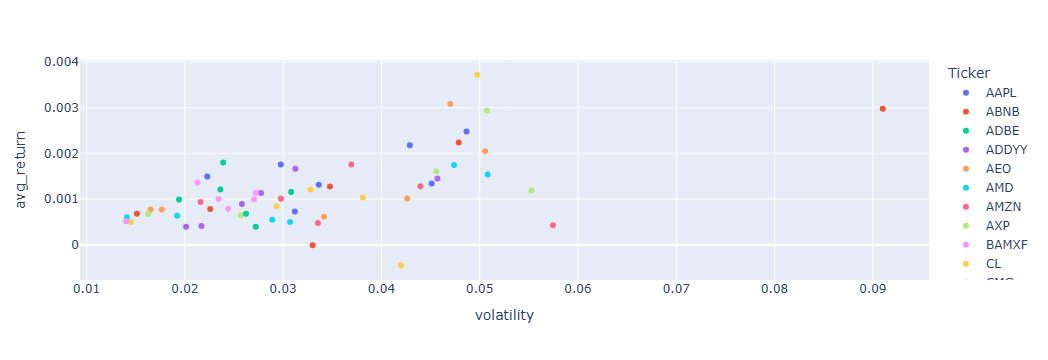

In [28]:
#use scatter plot to check relationship of thicker btw avg return vs volatility
px.scatter(
    risk_return,
    x="volatility",
    y="avg_return",
    hover_name="Ticker",
    color="Ticker"
)

In [30]:
#Identify which companies return more value to shareholders via dividends
dividends = new_df.groupby("Brand_Name")["Dividends"].sum().sort_values(ascending=False).head(10)
dividends

Brand_Name
bmw group              49.841
the home depot         42.942
procter & gamble       41.279
3m                     40.460
jpmorgan chase & co    39.050
mcdonald's             34.320
johnson & johnson      33.480
costco                 33.065
hershey company        26.434
toyota                 26.206
Name: Dividends, dtype: float64

<Axes: ylabel='Brand_Name'>

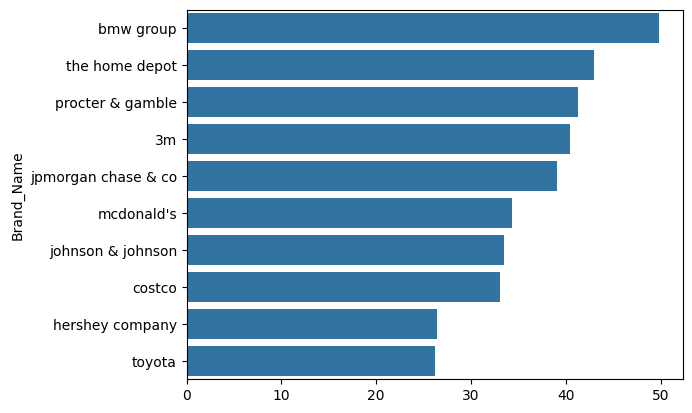

In [32]:
#represent dividends return values with bar plot
sns.barplot(
    x=dividends.values,
    y=dividends.index
)

<Axes: xlabel='Dividends_Flag', ylabel='Return'>

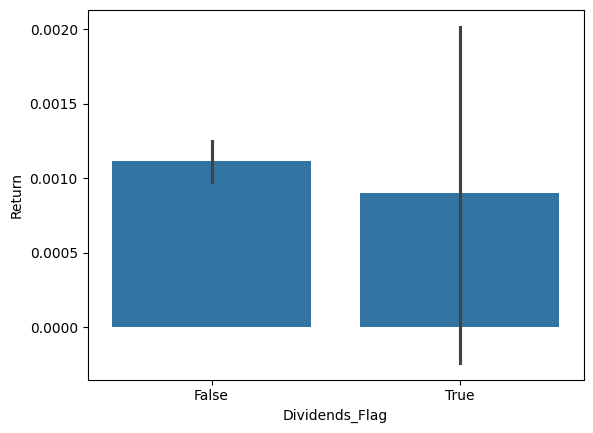

In [38]:
new_df["Dividends_Flag"] = new_df["Dividends"] > 0
sns.barplot(x="Dividends_Flag", y="Return", data=new_df)

In [40]:
#dividend yield trends across industries and countries.
new_df["Dividend_Yield"] = new_df["Dividends"] / new_df["Close"]
new_df["Dividend_Yield"].head()


307967    0.0
307916    0.0
307903    0.0
307852    0.0
307841    0.0
Name: Dividend_Yield, dtype: float64

In [47]:
#find industry_yield from the dividends_yield
industry_yield = new_df.groupby("Industry_Tag")["Dividend_Yield"].mean().sort_values(ascending=False)
industry_yield

Industry_Tag
consumer goods        0.000165
automotive            0.000124
manufacturing         0.000116
healthcare            0.000110
food & beverage       0.000094
luxury goods          0.000090
retail                0.000087
finance               0.000081
footwear              0.000080
apparel               0.000080
technology            0.000041
food                  0.000040
logistics             0.000031
hospitality           0.000025
aviation              0.000023
entertainment         0.000006
gaming                0.000005
e-commerce            0.000000
cryptocurrency        0.000000
financial services    0.000000
fitness               0.000000
music                 0.000000
social media          0.000000
Name: Dividend_Yield, dtype: float64

In [48]:
#find country_yield from the dividends_yield
country_yield = new_df.groupby("Country")["Dividend_Yield"].mean().sort_values(ascending=False)
country_yield

Country
netherlands    0.000183
germany        0.000166
switzerland    0.000076
usa            0.000056
france         0.000051
japan          0.000048
canada         0.000000
Name: Dividend_Yield, dtype: float64

In [49]:
#comparison of industries and company by return
industries_return = new_df.groupby("Industry_Tag")["Return"].mean().sort_values(ascending=False)
industries_return

Industry_Tag
cryptocurrency        0.002974
e-commerce            0.002338
financial services    0.002235
music                 0.002180
entertainment         0.001746
footwear              0.001484
social media          0.001453
technology            0.001286
luxury goods          0.001275
finance               0.001261
hospitality           0.001024
food                  0.001012
aviation              0.000967
automotive            0.000941
apparel               0.000919
retail                0.000910
food & beverage       0.000807
gaming                0.000798
logistics             0.000793
manufacturing         0.000636
consumer goods        0.000620
healthcare            0.000603
fitness               0.000431
Name: Return, dtype: float64

In [50]:
#comparison of industries and company by return
countries_return = new_df.groupby("Country")["Return"].mean().sort_values(ascending=False)
countries_return

Country
canada         0.003718
switzerland    0.001210
usa            0.001190
france         0.000921
germany        0.000770
japan          0.000551
netherlands    0.000538
Name: Return, dtype: float64

In [52]:
#comparison of industries and company by volume
industries_volume = new_df.groupby("Industry_Tag")["Volume"].sum().sort_values(ascending=False)
industries_volume

Industry_Tag
technology            2.776788e+12
e-commerce            4.860527e+11
automotive            2.509041e+11
finance               1.821921e+11
food & beverage       1.218665e+11
entertainment         9.632998e+10
retail                8.334752e+10
aviation              6.645035e+10
apparel               6.556698e+10
consumer goods        6.000488e+10
healthcare            3.715426e+10
food                  2.666594e+10
hospitality           2.174630e+10
footwear              1.681605e+10
financial services    1.518907e+10
gaming                1.479370e+10
manufacturing         1.445933e+10
social media          1.279122e+10
fitness               1.261963e+10
logistics             8.944345e+09
cryptocurrency        7.937626e+09
music                 2.368032e+09
luxury goods          3.917078e+08
Name: Volume, dtype: float64

In [53]:
#comparison of industries and company by volume
country_volume = new_df.groupby("Country")["Volume"].sum().sort_values(ascending=False)
country_volume

Country
usa            4.328920e+12
canada         2.955218e+10
netherlands    9.607591e+09
japan          9.384825e+09
switzerland    2.635714e+09
germany        7.117008e+08
france         5.677849e+08
Name: Volume, dtype: float64

In [55]:
industries_volatility = new_df.groupby("Industry_Tag")["Return"].std().sort_values(ascending=False)
industries_volatility

Industry_Tag
cryptocurrency        0.091013
fitness               0.057455
financial services    0.047863
social media          0.045703
footwear              0.044034
music                 0.042893
e-commerce            0.041143
entertainment         0.039741
aviation              0.037188
technology            0.034826
luxury goods          0.034762
retail                0.033949
gaming                0.032835
apparel               0.032532
automotive            0.029130
hospitality           0.027311
finance               0.026966
food                  0.025522
logistics             0.024408
food & beverage       0.020409
manufacturing         0.019218
consumer goods        0.015319
healthcare            0.014102
Name: Return, dtype: float64